In [2]:
import requests
import json
import pprint as pp
import pandas as pd
from laborstat import BLSservice

import numpy as np
import matplotlib.pyplot as plt


# Entertainment Total Spending based on Age

In [3]:
overall_on_age = BLSservice([ 'CXUENTRTAINLB0401M',
                              'CXUENTRTAINLB0402M',
                              'CXUENTRTAINLB0403M',
                              'CXUENTRTAINLB0404M',
                              'CXUENTRTAINLB0405M',
                              'CXUENTRTAINLB0406M',
                              'CXUENTRTAINLB0407M',
                              'CXUENTRTAINLB0408M',
                              'CXUENTRTAINLB0409M'
                             ], '2000', '2017')


In [4]:
overall_on_age.get_data()
overall_on_age.create_dataframe()

In [5]:
overall_on_age.item_df.head(10)

,SeriesTitle,Value,Year
0,All Consumer Units,3203,2017
1,All Consumer Units,2913,2016
2,All Consumer Units,2842,2015
3,All Consumer Units,2728,2014
4,All Consumer Units,2482,2013
5,All Consumer Units,2605,2012
6,All Consumer Units,2572,2011
7,All Consumer Units,2504,2010
8,All Consumer Units,2693,2009
9,All Consumer Units,2835,2008


In [6]:
overall_on_age.item_df.Value = pd.to_numeric(overall_on_age.item_df.Value, errors='coerce')

In [7]:
age_df = overall_on_age.item_df.pivot(index='SeriesTitle', columns='Year', values='Value')
age_df

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
SeriesTitle,,,,,,,,,,,,,,,,,,
All Consumer Units,1863,1953,2079,2060,2218,2388,2376,2698,2835,2693,2504,2572,2605,2482,2728,2842,2913,3203
Reference person between age 25 and 34,1876,2001,2027,1958,2122,2455,2237,2462,2766,2504,2251,2423,2382,2214,2418,2475,2564,2644
Reference person between age 35 and 44,2464,2508,2685,2519,2504,2765,2966,3551,3603,3317,3058,2926,3232,2958,3372,3192,3509,4001
Reference person between age 45 and 54,2231,2233,2565,2407,2711,3034,2770,3163,3297,3176,3088,3169,3051,3070,3184,3317,3654,4064
Reference person between age 55 and 64,1955,2337,2297,2414,2823,2429,2666,2730,3036,2906,2683,2769,2911,2651,2852,3323,3114,3444
Reference person between age 65 and 74,1403,1296,1371,2016,1879,2143,2049,2636,2418,2498,2341,2493,2413,2488,2988,3005,2850,3327
Reference person over age 65,1069,1067,1139,1469,1429,1593,1584,1966,1914,2062,1891,2009,2020,2027,2403,2464,2365,2636
Reference person over the age of 75,707,822,896,909,990,1032,1099,1255,1349,1587,1374,1437,1532,1422,1626,1728,1697,1657
Reference person under age 25,1091,1152,1212,950,1166,1393,1348,1448,1608,1233,1221,1345,1257,1243,1319,1354,1454,1488


In [8]:
age_df.index
age_df = age_df.rename(index={'Reference person between age 25 and 34': 'Between age 25 and 34', 
                      'Reference person between age 35 and 44': 'Between age 35 and 44', 
                      'Reference person between age 45 and 54': 'Between age 45 and 54',
                      'Reference person between age 55 and 64': 'Between age 55 and 64',
                      'Reference person between age 65 and 74': 'Between age 65 and 74',
                      'Reference person over age 65': 'Over age 65',
                      'Reference person over the age of 75': 'Over age 75',
                      'Reference person under age 25': 'Under age 25',
                     })
age_df

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
SeriesTitle,,,,,,,,,,,,,,,,,,
All Consumer Units,1863,1953,2079,2060,2218,2388,2376,2698,2835,2693,2504,2572,2605,2482,2728,2842,2913,3203
Between age 25 and 34,1876,2001,2027,1958,2122,2455,2237,2462,2766,2504,2251,2423,2382,2214,2418,2475,2564,2644
Between age 35 and 44,2464,2508,2685,2519,2504,2765,2966,3551,3603,3317,3058,2926,3232,2958,3372,3192,3509,4001
Between age 45 and 54,2231,2233,2565,2407,2711,3034,2770,3163,3297,3176,3088,3169,3051,3070,3184,3317,3654,4064
Between age 55 and 64,1955,2337,2297,2414,2823,2429,2666,2730,3036,2906,2683,2769,2911,2651,2852,3323,3114,3444
Between age 65 and 74,1403,1296,1371,2016,1879,2143,2049,2636,2418,2498,2341,2493,2413,2488,2988,3005,2850,3327
Over age 65,1069,1067,1139,1469,1429,1593,1584,1966,1914,2062,1891,2009,2020,2027,2403,2464,2365,2636
Over age 75,707,822,896,909,990,1032,1099,1255,1349,1587,1374,1437,1532,1422,1626,1728,1697,1657
Under age 25,1091,1152,1212,950,1166,1393,1348,1448,1608,1233,1221,1345,1257,1243,1319,1354,1454,1488


In [9]:
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams["figure.facecolor"] = 'w'

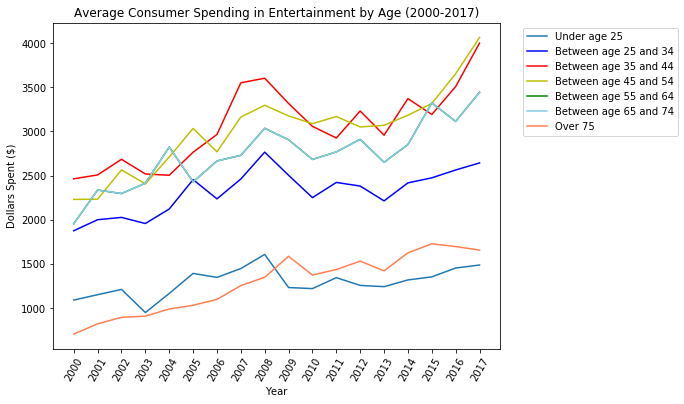

In [25]:
xlabels = age_df.columns.tolist()
xl = np.arange(len(xlabels))

under_25 = age_df.loc[age_df.index == 'Under age 25']
between_age_25_and_34 = age_df.loc[age_df.index == 'Between age 25 and 34']
between_age_35_and_44 = age_df.loc[age_df.index == 'Between age 35 and 44']
between_age_45_and_54 = age_df.loc[age_df.index == 'Between age 45 and 54']
between_age_55_and_64 = age_df.loc[age_df.index == 'Between age 55 and 64']
between_age_65_and_74 = age_df.loc[age_df.index == 'Between age 65 and 74']
over_75 = age_df.loc[age_df.index == 'Over age 75']

p1 = plt.plot(xlabels, under_25.values.tolist()[0], label='Under age 25')
p2 = plt.plot(xlabels, between_age_25_and_34.values.tolist()[0], color ='b', label='Between age 25 and 34')
p3 = plt.plot(xlabels, between_age_35_and_44.values.tolist()[0], color ='r', label='Between age 35 and 44')
p4 = plt.plot(xlabels, between_age_45_and_54.values.tolist()[0], color ='y', label='Between age 45 and 54')
p5 = plt.plot(xlabels, between_age_55_and_64.values.tolist()[0], color ='g', label='Between age 55 and 64')
p6 = plt.plot(xlabels, between_age_55_and_64.values.tolist()[0], color ='skyblue', label='Between age 65 and 74')
p7 = plt.plot(xlabels, over_75.values.tolist()[0], color ='coral', label='Over 75')

# plt.xticks(rotation=90)
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Average Consumer Spending in Entertainment by Age (2000-2017)')
plt.xlabel('Year')
plt.ylabel('Dollars Spent ($)')

# Save Figure
plt.savefig("CustomerSpendinginEntertainmentbyAge.png")

plt.show()


# Entertainment Total Spending based on Race

In [11]:
overall_on_race = BLSservice(['CXUENTRTAINLB0901M',
                              'CXUENTRTAINLB0903M',
                              'CXUENTRTAINLB0904M',
                              'CXUENTRTAINLB0905M'
                             ], '2000', '2017')


In [12]:
overall_on_race.get_data()
overall_on_race.create_dataframe()
overall_on_race.item_df.head(10)

,SeriesTitle,Value,Year
0,All Consumer Units,3203,2017
1,All Consumer Units,2913,2016
2,All Consumer Units,2842,2015
3,All Consumer Units,2728,2014
4,All Consumer Units,2482,2013
5,All Consumer Units,2605,2012
6,All Consumer Units,2572,2011
7,All Consumer Units,2504,2010
8,All Consumer Units,2693,2009
9,All Consumer Units,2835,2008


In [13]:
overall_on_race.item_df.Value = pd.to_numeric(overall_on_race.item_df.Value, errors='coerce')
race_df = overall_on_race.item_df.pivot(index='SeriesTitle', columns='Year', values='Value')
race_df

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
SeriesTitle,,,,,,,,,,,,,,,,,,
All Consumer Units,1863.0,1953.0,2079.0,2060.0,2218.0,2388.0,2376.0,2698.0,2835.0,2693.0,2504.0,2572.0,2605.0,2482.0,2728.0,2842.0,2913.0,3203.0
Race of ref. person: Black or African American,1014.0,988.0,1124.0,1007.0,1040.0,1242.0,1172.0,1288.0,1478.0,1404.0,1352.0,1432.0,1526.0,1344.0,1782.0,1500.0,1702.0,1643.0
Race of reference person: Asian(from 2003),NaN,NaN,NaN,1713.0,1789.0,1804.0,1941.0,2454.0,3447.0,2270.0,2192.0,2301.0,2303.0,2321.0,2205.0,2371.0,2418.0,2797.0
Race of rf. pers.: White and All Others(from 2003),NaN,NaN,NaN,2220.0,2401.0,2573.0,2564.0,2908.0,3007.0,2894.0,2687.0,2753.0,2784.0,2661.0,2903.0,3075.0,3133.0,3475.0


In [14]:
race_df = race_df.rename(index={'Race of ref. person: Black or African American': 'Black or African American', 
                      'Race of reference person: Asian(from 2003)': 'Asian', 
                      'Race of rf. pers.: White and All Others(from 2003)': 'White and All Others'
                     })
race_df

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
SeriesTitle,,,,,,,,,,,,,,,,,,
All Consumer Units,1863.0,1953.0,2079.0,2060.0,2218.0,2388.0,2376.0,2698.0,2835.0,2693.0,2504.0,2572.0,2605.0,2482.0,2728.0,2842.0,2913.0,3203.0
Black or African American,1014.0,988.0,1124.0,1007.0,1040.0,1242.0,1172.0,1288.0,1478.0,1404.0,1352.0,1432.0,1526.0,1344.0,1782.0,1500.0,1702.0,1643.0
Asian,NaN,NaN,NaN,1713.0,1789.0,1804.0,1941.0,2454.0,3447.0,2270.0,2192.0,2301.0,2303.0,2321.0,2205.0,2371.0,2418.0,2797.0
White and All Others,NaN,NaN,NaN,2220.0,2401.0,2573.0,2564.0,2908.0,3007.0,2894.0,2687.0,2753.0,2784.0,2661.0,2903.0,3075.0,3133.0,3475.0


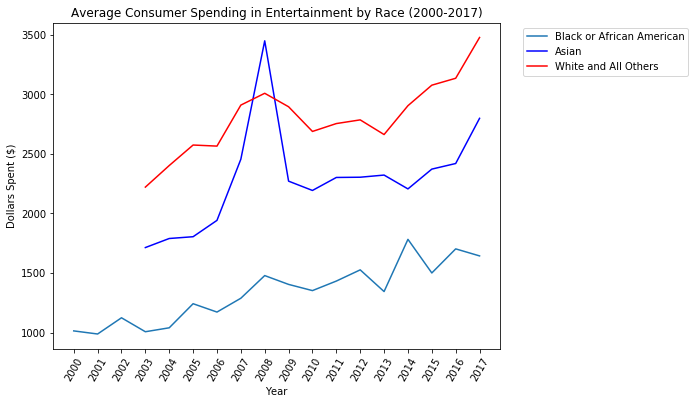

In [26]:
xlabels = race_df.columns.tolist()
xl = np.arange(len(xlabels))

african_american = race_df.loc[race_df.index == 'Black or African American']
asian = race_df.loc[race_df.index == 'Asian']
white_and_all_others = race_df.loc[race_df.index == 'White and All Others']

p1 = plt.plot(xlabels, african_american.values.tolist()[0], label='Black or African American')
p2 = plt.plot(xlabels, asian.values.tolist()[0], color ='b', label='Asian')
p3 = plt.plot(xlabels, white_and_all_others.values.tolist()[0], color ='r', label='White and All Others')

# plt.xticks(rotation=90)
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Average Consumer Spending in Entertainment by Race (2000-2017)')
plt.xlabel('Year')
plt.ylabel('Dollars Spent ($)')

# Save Figure
plt.savefig("CustomerSpendinginEntertainmentbyRace.png")

plt.show()


# Entertainment Total Spending based on Region

In [16]:
overall_on_region = BLSservice(['CXUENTRTAINLB1101M',
                                'CXUENTRTAINLB1102M',
                                'CXUENTRTAINLB1103M',
                                'CXUENTRTAINLB1104M',
                                'CXUENTRTAINLB1105M'
                               ], '2000', '2017')


In [17]:
overall_on_region.get_data()
overall_on_region.create_dataframe()
overall_on_region.item_df.head(10)

,SeriesTitle,Value,Year
0,All Consumer Units,3203,2017
1,All Consumer Units,2913,2016
2,All Consumer Units,2842,2015
3,All Consumer Units,2728,2014
4,All Consumer Units,2482,2013
5,All Consumer Units,2605,2012
6,All Consumer Units,2572,2011
7,All Consumer Units,2504,2010
8,All Consumer Units,2693,2009
9,All Consumer Units,2835,2008


In [18]:
overall_on_region.item_df.Value = pd.to_numeric(overall_on_region.item_df.Value, errors='coerce')
region_df = overall_on_region.item_df.pivot(index='SeriesTitle', columns='Year', values='Value')
region_df

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
SeriesTitle,,,,,,,,,,,,,,,,,,
All Consumer Units,1863,1953,2079,2060,2218,2388,2376,2698,2835,2693,2504,2572,2605,2482,2728,2842,2913,3203
Region of residence: midwest,2040,2220,2143,1978,2208,2384,2261,2585,2758,2627,2548,2505,2550,2460,2760,2859,3034,3341
Region of residence: northeast,1915,1854,2287,2117,2017,2263,2346,2811,2960,2767,2688,2632,2723,2615,2744,2754,2783,3133
Region of residence: south,1617,1652,1705,1812,2134,2112,2096,2320,2512,2467,2347,2350,2407,2165,2516,2682,2661,2832
Region of residence: west,2021,2241,2436,2494,2538,2950,2970,3319,3333,3062,2568,2950,2894,2928,3034,3177,3342,3763


In [19]:
region_df.index


Index(['All Consumer Units', 'Region of residence: midwest',
       'Region of residence: northeast', 'Region of residence: south',
       'Region of residence: west'],
      dtype='object', name='SeriesTitle')

In [20]:
region_df = region_df.rename(index={'Region of residence: midwest': 'Midwest', 
                      'Region of residence: northeast': 'Northeast', 
                      'Region of residence: south': 'South', 
                      'Region of residence: west': 'West'
                     })
region_df

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
SeriesTitle,,,,,,,,,,,,,,,,,,
All Consumer Units,1863,1953,2079,2060,2218,2388,2376,2698,2835,2693,2504,2572,2605,2482,2728,2842,2913,3203
Midwest,2040,2220,2143,1978,2208,2384,2261,2585,2758,2627,2548,2505,2550,2460,2760,2859,3034,3341
Northeast,1915,1854,2287,2117,2017,2263,2346,2811,2960,2767,2688,2632,2723,2615,2744,2754,2783,3133
South,1617,1652,1705,1812,2134,2112,2096,2320,2512,2467,2347,2350,2407,2165,2516,2682,2661,2832
West,2021,2241,2436,2494,2538,2950,2970,3319,3333,3062,2568,2950,2894,2928,3034,3177,3342,3763


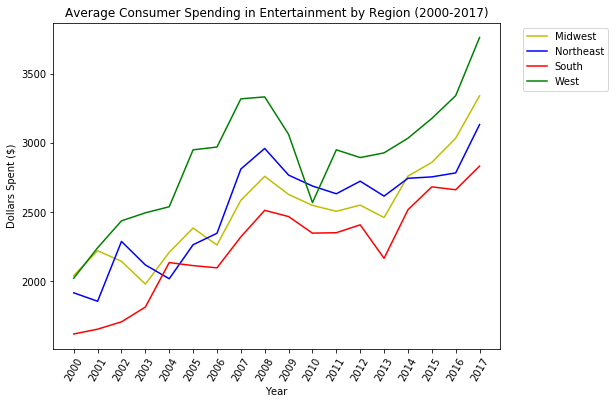

In [27]:
xlabels = region_df.columns.tolist()
xl = np.arange(len(xlabels))

midwest = region_df.loc[region_df.index == 'Midwest']
norteast = region_df.loc[region_df.index == 'Northeast']
south = region_df.loc[region_df.index == 'South']
west = region_df.loc[region_df.index == 'West']

p1 = plt.plot(xlabels, midwest.values.tolist()[0], color ='y', label='Midwest')
p2 = plt.plot(xlabels, norteast.values.tolist()[0], color ='b', label='Northeast')
p3 = plt.plot(xlabels, south.values.tolist()[0], color ='r', label='South')
p3 = plt.plot(xlabels, west.values.tolist()[0], color ='g', label='West')

# plt.xticks(rotation=90)
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Average Consumer Spending in Entertainment by Region (2000-2017)')
plt.xlabel('Year')
plt.ylabel('Dollars Spent ($)')

# Save Figure
plt.savefig("CustomerSpendinginEntertainmentbyRegion.png")

plt.show()
